# Resolvendo um Problema Linearmente Separável

Autor: Vyctor Lima Negreiros

## Descrição da atividade

Construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto.

IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from perceptron import *

FUNÇÕES AUXILIARES

In [2]:
# A partir dos dados lidos do dataset realiza a separação das saídas esperadas
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

In [3]:
# A partir das saídas cria uma lista com sua respectiva cor de classificação
def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores

In [4]:
# A partir dos dados lidos do dataset realiza a separação das entradas
def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

LEITURA DO DATASET

In [5]:
# Leitura do arquivo dataAll.txt
data = np.fromfile("../datasets/dataAll.txt", dtype=float)
print(data.shape)

(3000,)


TRATAMENTO DO DATASET

In [6]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(1000, 3)



In [7]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(1000,)


In [8]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(1000, 3)


APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [9]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[-0.33516445 -0.28160367  0.09070548]


In [10]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta)

Peso: [-0.33516445 -0.28160367  0.09070548]
Pesos:  [ -0.23516445  36.09723633 -24.32352452]
Pesos:  [  -0.13516445  -17.56181367 -100.81927452]
Pesos:  [ -0.23516445  55.23420633 -64.98971452]
Pesos:  [ -0.33516445 137.83290633  14.86611548]
Pesos:  [ -0.23516445 143.67866633 -63.42847452]
Pesos:  [-1.35164453e-01  1.03669756e+02 -1.41321165e+02]
Pesos:  [-3.51644528e-02  1.57339566e+02 -9.22288945e+01]
Pesos:  [-1.35164453e-01  1.04379506e+02 -1.49098355e+02]
Pesos:  [-3.51644528e-02  1.63939026e+02 -9.89760245e+01]
Pesos:  [-1.35164453e-01  1.18414396e+02 -1.64611955e+02]
Pesos:  [-3.51644528e-02  2.09130256e+02 -8.98986345e+01]
Pesos:  [-1.35164453e-01  1.51349266e+02 -1.50206785e+02]
Pesos:  [  -0.23516445  103.08270633 -198.67650452]
Pesos:  [  -0.33516445  173.53005633 -156.56023452]
Pesos:  [  -0.43516445  126.68805633 -207.97010452]
Pesos:  [  -0.53516445  196.55168633 -143.75116452]
Pesos:  [  -0.43516445  140.71595633 -199.92869452]
Pesos:  [  -0.53516445  217.70342633 -135.

In [11]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  3
Pesos finais:  [  -0.73516445  218.52093633 -217.64154452]
Total de ajustes de pesos: 72


GRÁFICO DA SOLUÇÃO

In [12]:
# Criando a lista de cores
cores = criar_cores(saidas)
# Cálculo dos coeficientes da linha de decisão
b = pesos[0]/pesos[2]
a = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = int(math.ceil(min(entradas[:,1])))
maior = int(math.ceil(max(entradas[:,1])))
for i in range(menor, maior, 1):
    x.append(i)
    valor = b + a*(i)
    y.append(valor)
print(a, b)

1.0040405512501314 0.0033778682024775296


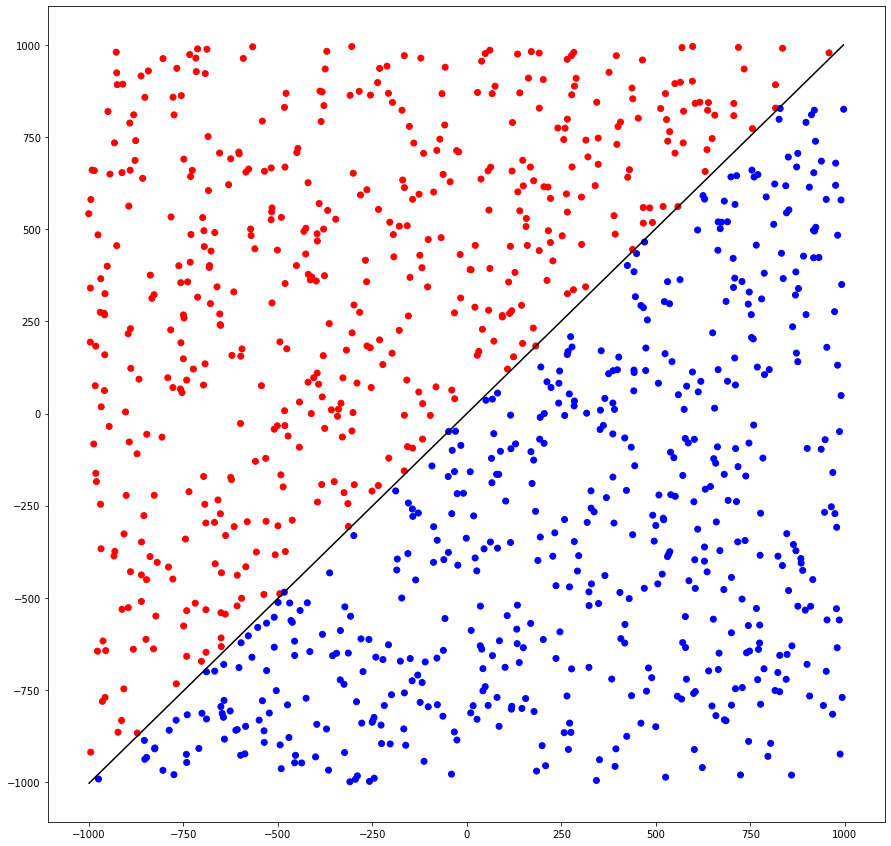

In [13]:
# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.pyplot.plot(x, y, color="black", markersize=100)
plt.pyplot.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.pyplot.show()